# Title here


## Import libraries

In [1]:
%matplotlib inline

# Python core
import os
import math

# Scipy core
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# PCA
from numpy import linalg as LA
from sklearn.decomposition import PCA

## Load preprocessed PHQ-9 and GAD data from CSV
These CSV files have already been extracted from the master data array, using the above cell.

In [2]:
phq = pd.read_csv('./phq.csv')
gad = pd.read_csv('./gad.csv')

# Figure plotting settings

In [3]:
main_output_directory = '/Users/ericmiller/Documents/UCSD/Jenkins Lab/Oceanside Project/Basic Analysis Paper/Figures/Panels/'

outdir = os.path.expanduser(main_output_directory)
plt.rcParams['pdf.fonttype'] = 42  # embed fonts so we can edit in Illustrator
resolution = 1000  # DPI

## PCA of PHQ-9 item responses

PHQ-9
PC1 explains 0.546694 percent of variance
PC2 explains 0.132440 percent of variance

95th percentile of randomly generated eigenvalues:
[2.26840414 1.91801421 1.68707685 1.49536522 1.33338121 1.18573064
 1.04246285 0.90643769 0.76124787]

Actual eigenvalues of the data:
[3.66376817 0.88757414 0.65857321 0.45285063 0.38815642 0.34796094
 0.14772855 0.11178791 0.04328235]

 Note that only the first PC's eigenvalue of the actual datasets is greater than the respective randomly generated eigenvalues:


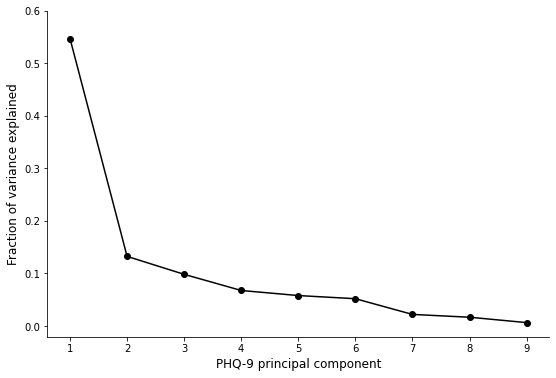

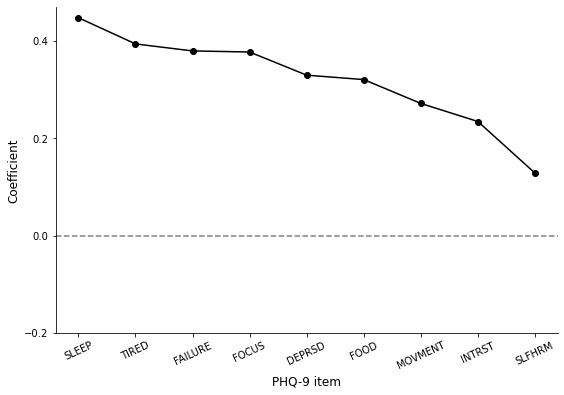

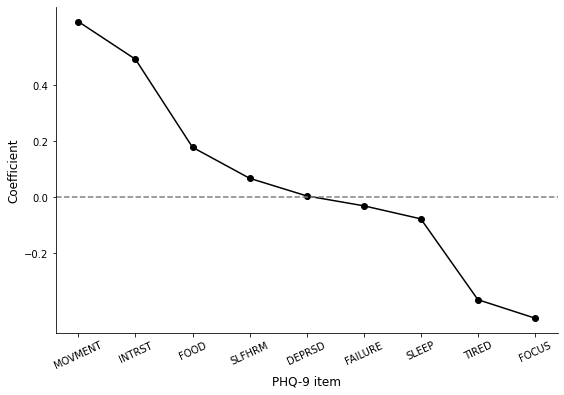

In [4]:
phq_items = ['DEPRSD', 'INTRST', 'SLEEP', 'FOOD', 'TIRED', 'FAILURE', 'FOCUS', 'MOVMENT', 'SLFHRM']

# Create matrices that just have the item scores
phq_clean = phq[phq_items].dropna()
A = phq_clean.copy()
pcaRes = PCA().fit(A)
eigenvalues = pcaRes.explained_variance_
varexp = pcaRes.explained_variance_ratio_
coef = pcaRes.components_

print("PHQ-9")
print("PC1 explains %f percent of variance" % varexp[0])
print("PC2 explains %f percent of variance" % varexp[1])

# Scree plot
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
plt.plot(range(len(varexp)), varexp, marker='o', color='k')
plt.ylabel("Fraction of variance explained", fontsize=12)
plt.xlabel('PHQ-9 principal component', fontsize=12)
plt.xticks(range(0, 9), range(1, 10))
plt.yticks(np.arange(0, 0.7, 0.1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig(fname=outdir+'phq_scree.pdf', format='pdf', dpi=resolution, bbox_inches="tight")


# PC1
zipped = sorted(zip(phq_items, coef[0]), key=lambda x: x[1], reverse=True)
sorted_items = [z[0] for z in zipped]
sorted_coefs = [z[1] for z in zipped]
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
plt.plot(sorted_coefs, color='k', marker='o')
ax.axhline(y=0, linestyle='--', color='grey')
plt.xticks(range(len(sorted_items)), sorted_items, rotation=25)
plt.xlabel('PHQ-9 item', fontsize=12)
plt.ylabel('Coefficient', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.yticks(np.arange(-0.2, 0.6, 0.2))

# PC2
zipped = sorted(zip(phq_items, coef[1]), key=lambda x: x[1], reverse=True)
sorted_items = [z[0] for z in zipped]
sorted_coefs = [z[1] for z in zipped]
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
plt.plot(sorted_coefs, color='k', marker='o')
ax.axhline(y=0, linestyle='--', color='grey')
plt.xticks(range(len(sorted_items)), sorted_items, rotation=25)
plt.xlabel('PHQ-9 item', fontsize=12)
plt.ylabel('Coefficient', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.yticks(np.arange(-0.2, 0.6, 0.2))


n = 10000
percentile = 0.95
all_eigs = []
matrix_shape = phq_clean.dropna().shape
for i in range(n):
    rand = np.random.choice(4, matrix_shape) # random item response matrix
    pca_rand = PCA().fit(rand)
    all_eigs.append(pca_rand.explained_variance_) # explained_variance field are the eigenvalues
all_eigs = np.array(all_eigs)
all_eigs.sort(axis=0)

print("\n95th percentile of randomly generated eigenvalues:")
print(all_eigs[int(percentile * n), :]) # print the 95th percentile eigenvalue for each column

print("\nActual eigenvalues of the data:")
print(eigenvalues)

print("\n Note that only the first PC's eigenvalue of the actual datasets is greater than the respective randomly generated eigenvalues:")


## PCA on Modified GAD-7 item responses

GAD
PC1 explains 0.606560 percent of variance
PC2 explains 0.084039 percent of variance

95th percentile of randomly generated eigenvalues:
[2.3335974  1.97726977 1.74629227 1.56557458 1.39686681 1.25133508
 1.11493818 0.98588135 0.8549723  0.71882798]

Actual eigenvalues of the data:
[7.14161527 0.9894741  0.91609266 0.65205181 0.59657456 0.50200607
 0.31244907 0.27136727 0.22376769 0.16857412]


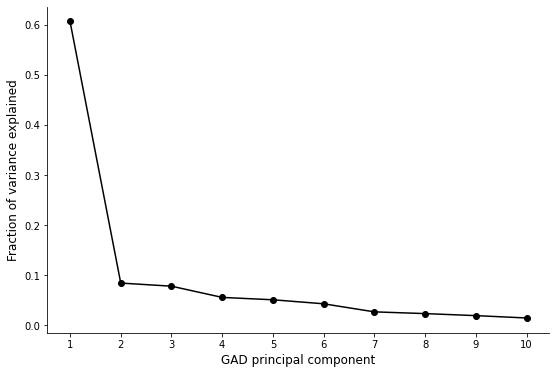

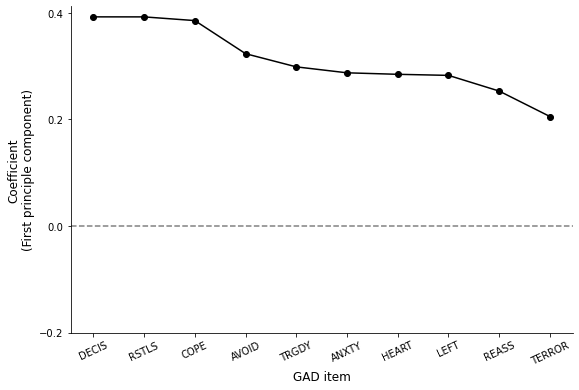

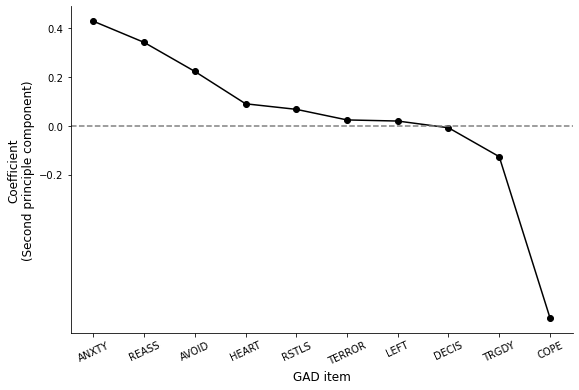

In [5]:
from numpy import linalg as LA
from sklearn.decomposition import PCA

# Create matrices that just have the item scores
gad_items = ['TERROR','ANXTY', 'TRGDY', 'HEART', 'RSTLS', 'AVOID', 
             'LEFT', 'DECIS', 'REASS', 'COPE']
gad_clean = gad[gad_items].dropna()
A = gad_clean.copy()
pcaRes = PCA().fit(A)
eigenvalues = pcaRes.explained_variance_
varexp = pcaRes.explained_variance_ratio_
coef = pcaRes.components_

print("GAD")
print("PC1 explains %f percent of variance" % varexp[0])
print("PC2 explains %f percent of variance" % varexp[1])

# Scree plot
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
plt.plot(range(len(varexp)), varexp, marker='o', color='k')
plt.ylabel("Fraction of variance explained", fontsize=12)
plt.xlabel('GAD principal component', fontsize=12)
plt.xticks(range(0, len(varexp)), range(1, len(varexp)+1))
plt.yticks(np.arange(0, 0.7, 0.1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig(fname=outdir+'gad_scree.pdf', format='pdf', dpi=resolution, bbox_inches="tight")

# PC1
zipped = sorted(zip(gad_items, coef[0]), key=lambda x: x[1], reverse=True)
sorted_items = [z[0] for z in zipped]
sorted_coefs = [z[1] for z in zipped]
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
plt.plot(sorted_coefs, color='k', marker='o')
ax.axhline(y=0, linestyle='--', color='grey')
plt.xticks(range(len(sorted_items)), sorted_items, rotation=25)
plt.xlabel('GAD item', fontsize=12)
plt.ylabel('Coefficient\n(First principle component)', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.yticks(np.arange(-0.2, 0.6, 0.2))


# PC2
zipped = sorted(zip(gad_items, coef[1]), key=lambda x: x[1], reverse=True)
sorted_items = [z[0] for z in zipped]
sorted_coefs = [z[1] for z in zipped]
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
plt.plot(sorted_coefs, color='k', marker='o')
ax.axhline(y=0, linestyle='--', color='grey')
plt.xticks(range(len(sorted_items)), sorted_items, rotation=25)
plt.xlabel('GAD item', fontsize=12)
plt.ylabel('Coefficient\n(Second principle component)', fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.yticks(np.arange(-0.2, 0.6, 0.2))


n = 10000
percentile = 0.95
all_eigs = []
matrix_shape = gad_clean.shape
for i in range(n):
    rand = np.random.choice(4, matrix_shape) # random item response matrix
    pca_rand = PCA().fit(rand)
    all_eigs.append(pca_rand.explained_variance_) # explained_variance field are the eigenvalues
all_eigs = np.array(all_eigs)
all_eigs.sort(axis=0)

print("\n95th percentile of randomly generated eigenvalues:")
print(all_eigs[int(percentile * n), :]) # print the 95th percentile eigenvalue for each column

print("\nActual eigenvalues of the data:")
print(eigenvalues)

## Total score distributions

Shapiro-Wilk Test for PHQ-9 Total Scores: 0.000001
Shapiro-Wilk Test for Modified GAD Total Score: 0.000000


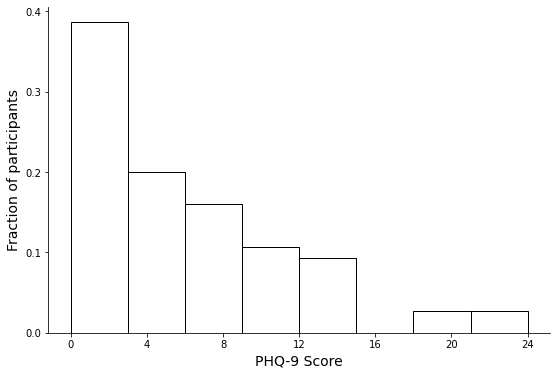

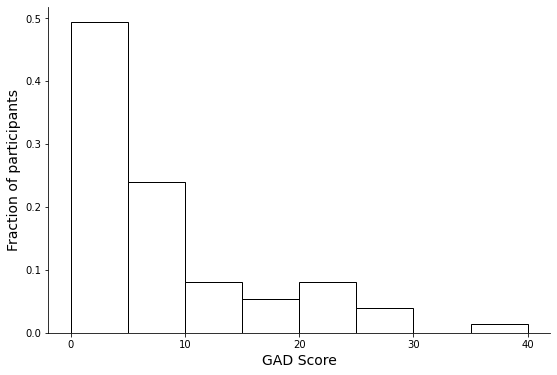

In [6]:
# Histogram bins
phqbins = np.arange(0, 26, 3)
gadbins = np.arange(0, 45, 5)

# Weights for converting histograms into frequency distributions
phqweights = np.ones_like(phq['PHQSCORE'])/len(phq['PHQSCORE'])
gadweights = np.ones_like(gad['GADRAW'])/len(gad['GADRAW'])

#bins=phqbins, 

# PHQ-9
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
plt.hist(phq['PHQSCORE'], bins=phqbins, weights=phqweights, color='white', edgecolor='black')
plt.xlabel('PHQ-9 Score', fontsize=14)
plt.ylabel('Fraction of participants', fontsize=14)
plt.xticks([0, 4, 8, 12, 16, 20, 24])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4])
# plt.ylim([0, 0.35])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
W, p = stats.shapiro(phq['PHQSCORE'])
print("Shapiro-Wilk Test for PHQ-9 Total Scores: %f" % p)
plt.savefig(fname=outdir+'phq_hist.pdf', format='pdf', dpi=resolution, bbox_inches="tight")

#bins=gadbins, 
# Modified GAD
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
plt.hist(gad['GADRAW'], bins=gadbins, weights=gadweights, color='white', edgecolor='black')
plt.xlabel('GAD Score', fontsize=14)
plt.ylabel('Fraction of participants', fontsize=14)
plt.xticks([0, 10, 20, 30, 40])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
# plt.ylim([0, 0.4])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
W, p = stats.shapiro(gad['GADRAW'])
print("Shapiro-Wilk Test for Modified GAD Total Score: %f" % p)
plt.savefig(fname=outdir+'gad_hist.pdf', format='pdf', dpi=resolution, bbox_inches="tight")

## Total score distributions by sex

Shapiro-Wilk Test for PHQ-9 Total Scores: 0.000037
Shapiro-Wilk Test for PHQ-9 Total Scores: 0.001291
Shapiro-Wilk Test for Modified GAD Total Score: 0.000004
Shapiro-Wilk Test for Modified GAD Total Score: 0.000049


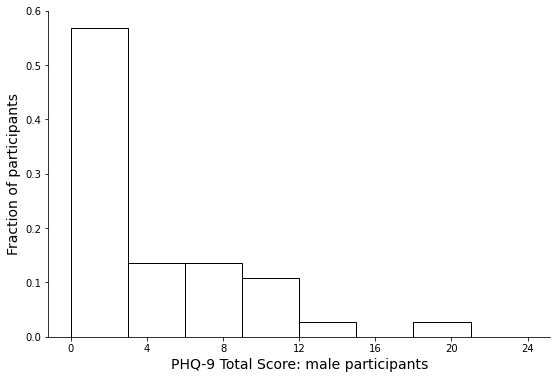

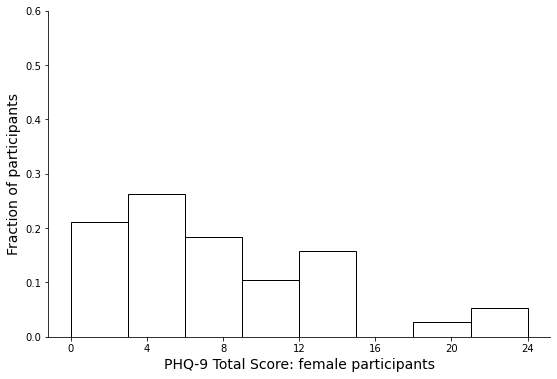

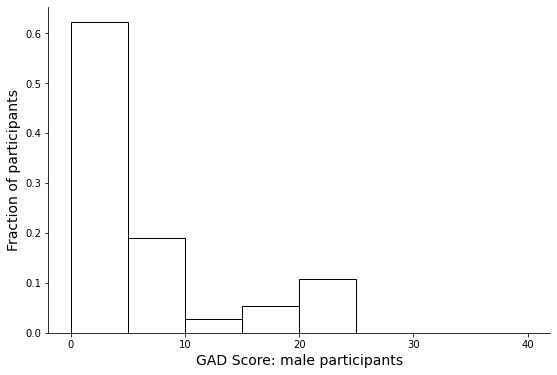

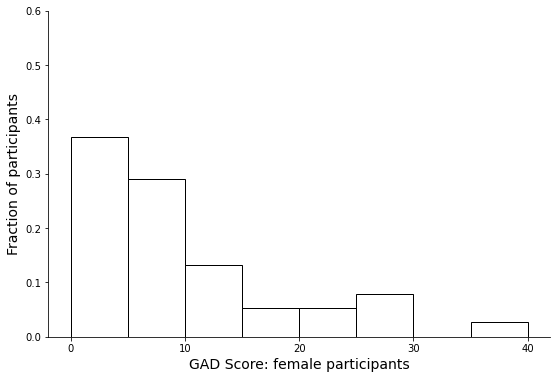

In [7]:
# PHQ-9 Males
male = phq[phq['SEX']=='Male']
phqweights = np.ones_like(male['PHQSCORE'])/len(male['PHQSCORE'])
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
plt.hist(male['PHQSCORE'], bins=phqbins, weights=phqweights, color='white', edgecolor='black')
plt.xlabel('PHQ-9 Total Score: male participants', fontsize=14)
plt.ylabel('Fraction of participants', fontsize=14)
plt.xticks([0, 4, 8, 12, 16, 20, 24])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# plt.ylim([0, 0.35])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
W, p = stats.shapiro(male['PHQSCORE'])
print("Shapiro-Wilk Test for PHQ-9 Total Scores: %f" % p)


# PHQ-9 Females
female = phq[phq['SEX']=='Female']
phqweights = np.ones_like(female['PHQSCORE'])/len(female['PHQSCORE'])
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
plt.hist(female['PHQSCORE'], bins=phqbins, weights=phqweights, color='white', edgecolor='black')
plt.xlabel('PHQ-9 Total Score: female participants', fontsize=14)
plt.ylabel('Fraction of participants', fontsize=14)
plt.xticks([0, 4, 8, 12, 16, 20, 24])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# plt.ylim([0, 0.35])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
W, p = stats.shapiro(female['PHQSCORE'])
print("Shapiro-Wilk Test for PHQ-9 Total Scores: %f" % p)


# Modified GAD Males
male = gad[gad['SEX']=='Male']
gadweights = np.ones_like(male['GADRAW'])/len(male['GADRAW'])
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
plt.hist(male['GADRAW'], bins=gadbins, weights=gadweights, color='white', edgecolor='black')
plt.xlabel('GAD Score: male participants', fontsize=14)
plt.ylabel('Fraction of participants', fontsize=14)
plt.xticks([0, 10, 20, 30, 40])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# plt.ylim([0, 0.4])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
W, p = stats.shapiro(male['GADRAW'])
print("Shapiro-Wilk Test for Modified GAD Total Score: %f" % p)


# Modified GAD Females
female = gad[gad['SEX']=='Female']
gadweights = np.ones_like(female['GADRAW'])/len(female['GADRAW'])
plt.figure(figsize=(9, 6))
ax = plt.subplot(111)
plt.hist(female['GADRAW'], bins=gadbins, weights=gadweights, color='white', edgecolor='black')
plt.xlabel('GAD Score: female participants', fontsize=14)
plt.ylabel('Fraction of participants', fontsize=14)
plt.xticks([0, 10, 20, 30, 40])
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
# plt.ylim([0, 0.4])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
W, p = stats.shapiro(female['GADRAW'])
print("Shapiro-Wilk Test for Modified GAD Total Score: %f" % p)

## Mean and Median total scores

In [8]:
male_phq = phq[phq['SEX']=='Male']
female_phq = phq[phq['SEX']=='Female']
male_gad = gad[gad['SEX']=='Male']
female_gad = gad[gad['SEX']=='Female']

print("--PHQ-9--")
print("All mean: %f (%f)" % (phq['PHQSCORE'].mean(), phq['PHQSCORE'].std()))
print("All median: %f (%f)" % (phq['PHQSCORE'].median(), stats.iqr(phq['PHQSCORE'])))
print("Male mean: %f (%f)" % (male_phq['PHQSCORE'].mean(), male_phq['PHQSCORE'].std()))
print("Female mean: %f (%f)" % (female_phq['PHQSCORE'].mean(), female_phq['PHQSCORE'].std()))
print("Male median: %f (%f)" % (male_phq['PHQSCORE'].median(), stats.iqr(male_phq['PHQSCORE'])))
print("Female median: %f (%f)" % (female_phq['PHQSCORE'].median(), stats.iqr(female_phq['PHQSCORE'])))
print('\n')

print("--GAD--")
print("All mean: %f (%f)" % (gad['GADRAW'].mean(), gad['GADRAW'].std()))
print("All median: %f (%f)" % (gad['GADRAW'].median(), stats.iqr(gad['GADRAW'])))
print("Male mean: %f (%f)" % (male_gad['GADRAW'].mean(), male_gad['GADRAW'].std()))
print("Female mean: %f (%f)" % (female_gad['GADRAW'].mean(), female_gad['GADRAW'].std()))
print("Male median: %f (%f)" % (male_gad['GADRAW'].median(), stats.iqr(male_gad['GADRAW'])))
print("Female median: %f (%f)" % (female_gad['GADRAW'].median(), stats.iqr(female_gad['GADRAW'])))
print('\n')

--PHQ-9--
All mean: 5.706800 (5.462827)
All median: 3.380000 (6.500000)
Male mean: 4.017027 (4.347529)
Female mean: 7.352105 (5.971539)
Male median: 2.000000 (6.000000)
Female median: 6.000000 (8.000000)


--GAD--
All mean: 7.447333 (8.234165)
All median: 5.000000 (9.500000)
Male mean: 5.690541 (6.905863)
Female mean: 9.157895 (9.116443)
Male median: 3.000000 (8.000000)
Female median: 6.000000 (7.750000)




## Total score group differences by sex

PHQ-9:
MannwhitneyuResult(statistic=427.0, pvalue=0.0033689544527341743)
-- Female median: 6.0
-- Male median: 2.0


GAD:
MannwhitneyuResult(statistic=489.5, pvalue=0.023297149771079835)
-- Female median: 6.0
-- Male median: 3.0


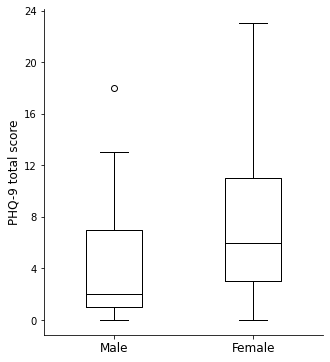

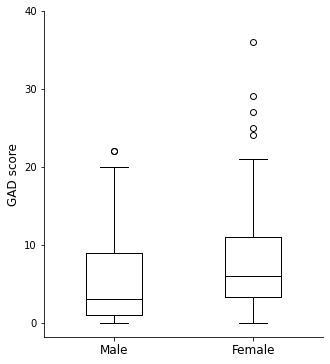

In [9]:
# PHQ-9
male = phq[phq['SEX']=='Male']['PHQSCORE']
female = phq[phq['SEX']=='Female']['PHQSCORE']
plt.figure(figsize=(5, 6))
ax = plt.subplot(111)
plt.boxplot([male, female], widths=(0.4, 0.4), medianprops=dict(color='k'))
plt.ylabel('PHQ-9 total score', fontsize=12)
plt.xticks([1,2], ['Male', 'Female'], fontsize=12)
plt.yticks(np.arange(0, 28, 4))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
print("PHQ-9:")
print(stats.mannwhitneyu(male, female))
print("-- Female median: " + str(female.median()))
print("-- Male median: " + str(male.median()))
print("\n")
plt.savefig(fname=outdir+'mvf_phq.pdf', format='pdf', dpi=resolution, bbox_inches="tight")

# Modified GAD-7
male = gad[gad['SEX']=='Male']['GADRAW']
female = gad[gad['SEX']=='Female']['GADRAW']
plt.figure(figsize=(5, 6))
ax = plt.subplot(111)
plt.boxplot([male, female], widths=(0.4, 0.4), medianprops=dict(color='k'))
plt.ylabel('GAD score', fontsize=12)
plt.xticks([1,2], ['Male', 'Female'], fontsize=12)
plt.yticks(np.arange(0, 50, 10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
print("GAD:")
print(stats.mannwhitneyu(male, female))
print("-- Female median: " + str(female.median()))
print("-- Male median: " + str(male.median()))
plt.savefig(fname=outdir+'mvf_gad.pdf', format='pdf', dpi=resolution, bbox_inches="tight")

## Correlation between PHQ-9 and Modified GAD-7 by sex

(Male) r: 0.8638482459055635, r^2: 0.746233791954119
(Female) r: 0.8733410677129207, r^2: 0.7627246205539444


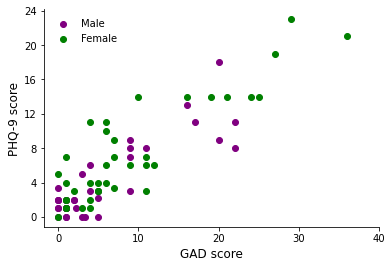

In [10]:
phq_male = phq[phq['SEX']=='Male']['PHQSCORE']
phq_female = phq[phq['SEX']=='Female']['PHQSCORE']
gad_male = gad[gad['SEX']=='Male']['GADRAW']
gad_female = gad[gad['SEX']=='Female']['GADRAW']

plt.figure()
ax = plt.subplot(111)
l1 = plt.scatter(gad_male.values, phq_male.values, marker='o', color='purple')
l2 = plt.scatter(gad_female.values, phq_female.values, marker='o', color='green')
plt.xlabel('GAD score', fontsize=12)
plt.ylabel('PHQ-9 score', fontsize=12)
plt.xticks(np.arange(0, 50, 10))
plt.yticks(np.arange(0, 28, 4))
plt.legend([l1, l2], ['Male', 'Female'], frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.savefig(fname=outdir+'phq_vs_gad.pdf', format='pdf', dpi=resolution, bbox_inches="tight")



r, p = stats.pearsonr(gad_male.values, phq_male.values)
print("(Male) r: " + str(r) + ", r^2: " + str(r**2))

r, p = stats.pearsonr(gad_female.values, phq_female.values)
print("(Female) r: " + str(r) + ", r^2: " + str(r**2))




## Which PHQ-9 items contribute most to sex differences?

Bonferroni criteria: 0.005555555555555556

TIRED
Ttest_indResult(statistic=3.564047192461813, pvalue=0.0006627728619830385)
5.183050695165585


FAILURE
Ttest_indResult(statistic=2.963980748736889, pvalue=0.004148241214837014)
4.347269163133091


DEPRSD
Ttest_indResult(statistic=3.0009497170739743, pvalue=0.0037274256065450645)
4.329823396061467


SLEEP
Ttest_indResult(statistic=2.4163289791854203, pvalue=0.01828904965224441)
3.414573920879948


FOCUS
Ttest_indResult(statistic=1.935712994954283, pvalue=0.05694236334151111)
2.7821557068178326


SLFHRM
Ttest_indResult(statistic=1.771144896497849, pvalue=0.08088958920809361)
2.6824258130139644


FOOD
Ttest_indResult(statistic=1.3885727240334662, pvalue=0.16936550367259917)
2.0182689318094886


INTRST
Ttest_indResult(statistic=0.6529663242967831, pvalue=0.5159168874358797)
0.922695114159199


MOVMENT
Ttest_indResult(statistic=-0.262798505506691, pvalue=0.793477822591942)
-0.3722028857635984




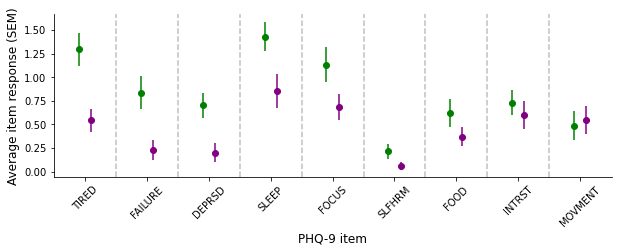

In [11]:
phq_items = ['DEPRSD', 'INTRST', 'SLEEP', 'FOOD', 'TIRED', 'FAILURE', 'FOCUS', 'MOVMENT', 'SLFHRM']
male = phq[phq['SEX']=='Male'].dropna()
female = phq[phq['SEX']=='Female'].dropna()

# Compute normalized mean difference
male_means = male[phq_items].mean()
male_sems = male[phq_items].sem()
female_means = female[phq_items].mean()
female_sems = female[phq_items].sem()
norm_diffs = (female_means - male_means) / ((female_sems + male_sems)/2)

# Sort according to normaized mean difference
norm_diffs_sorted = sorted(list(zip(phq_items, norm_diffs.values)), key=lambda x: x[1], reverse=True)
sorted_items = [x[0] for x in norm_diffs_sorted]
sorted_diffs = [x[1] for x in norm_diffs_sorted]

# Plot item means, sorted by normalized mean difference
plt.figure(figsize=(10,3))
ax = plt.subplot(111)
f = ax.errorbar(x=np.arange(0, 18, 2), y=female[sorted_items].mean(), yerr=female[sorted_items].sem(), 
                linestyle='None', color='green', marker='o')
m = ax.errorbar(x=np.arange(0, 18, 2)+0.4, y=male[sorted_items].mean(), yerr=male[sorted_items].sem(), 
                linestyle='None', color='purple', marker='o')
plt.xticks(np.arange(0, 18, 2)+0.2, sorted_items, rotation=45)
plt.xlabel('PHQ-9 item', fontsize=12)
plt.ylabel('Average item response (SEM)', fontsize=12)
# plt.legend([f, m], ['Female', 'Male'], frameon=False, loc='upper right')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
for lineidx in [1.2, 3.2, 5.2, 7.2, 9.2, 11.2, 13.2, 15.2]:
    ax.axvline(x=lineidx, linestyle='--', color='grey', alpha=0.5)
plt.savefig(fname=outdir+'mvf_items_phq.pdf', format='pdf', dpi=resolution, bbox_inches="tight")

print("Bonferroni criteria: " + str(0.05 / 9) + "\n")
for item in sorted_items:
    print(item)
    print(stats.ttest_ind(female[item], male[item]))
    print(norm_diffs[item])
    print('\n')


## Which GAD items contribute most to sex differences?

Bonferroni criteria: 0.005

TERROR
Ttest_indResult(statistic=2.910197338394114, pvalue=0.004820997342531685)
4.500444856620324


ANXTY
Ttest_indResult(statistic=2.446689737325467, pvalue=0.016895330118898117)
3.493674847138787


REASS
Ttest_indResult(statistic=1.7816760786909838, pvalue=0.0790783935554274)
2.5843724918744164


RSTLS
Ttest_indResult(statistic=1.3713972296162118, pvalue=0.17456993925661138)
1.948686497104731


HEART
Ttest_indResult(statistic=1.3106563530102198, pvalue=0.19419772301484337)
1.864167281129325


AVOID
Ttest_indResult(statistic=1.2272774377168245, pvalue=0.22377214440557375)
1.755495292769651


DECIS
Ttest_indResult(statistic=1.0665735008082928, pvalue=0.28977788401564486)
1.5333118022983765


TRGDY
Ttest_indResult(statistic=1.006403337726729, pvalue=0.3176392241403178)
1.42980685553234


COPE
Ttest_indResult(statistic=0.5393609608326407, pvalue=0.5913252728776088)
0.7631902545185298


LEFT
Ttest_indResult(statistic=0.3053196205322677, pvalue=0.76101605301536

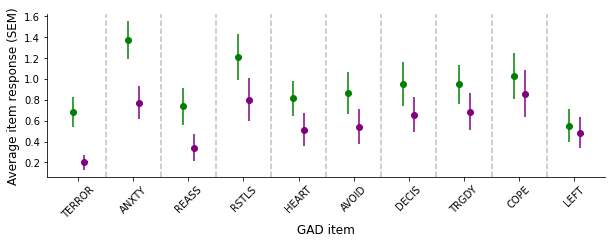

In [12]:
gad_items = ['TERROR','ANXTY', 'TRGDY', 'HEART', 'RSTLS', 'AVOID', 'LEFT', 'DECIS', 'REASS', 'COPE']
male = gad[gad['SEX']=='Male'].dropna()
female = gad[gad['SEX']=='Female'].dropna()

# Compute normalized mean difference
male_means = male[gad_items].mean()
male_sems = male[gad_items].sem()
female_means = female[gad_items].mean()
female_sems = female[gad_items].sem()
norm_diffs = (female_means - male_means) / ((female_sems + male_sems)/2)

# Sort according to normaized mean difference
norm_diffs_sorted = sorted(list(zip(gad_items, norm_diffs.values)), key=lambda x: x[1], reverse=True)
sorted_items = [x[0] for x in norm_diffs_sorted]
sorted_diffs = [x[1] for x in norm_diffs_sorted]

# Plot item means, sorted by normalized mean difference
plt.figure(figsize=(10,3))
ax = plt.subplot(111)
f = ax.errorbar(x=np.arange(0, 20, 2), y=female[sorted_items].mean(), yerr=female[sorted_items].sem(), 
                linestyle='None', color='green', marker='o')
m = ax.errorbar(x=np.arange(0, 20, 2)+0.4, y=male[sorted_items].mean(), yerr=male[sorted_items].sem(), 
                linestyle='None', color='purple', marker='o')
plt.xticks(np.arange(0, 20, 2)+0.2, sorted_items, rotation=45)
plt.xlabel('GAD item', fontsize=12)
plt.ylabel('Average item response (SEM)', fontsize=12)
# plt.legend([f, m], ['Female', 'Male'], frameon=False, loc='upper right')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
for lineidx in np.arange(1.2, 19.2, 2.0):
    ax.axvline(x=lineidx, linestyle='--', color='grey', alpha=0.5)
plt.savefig(fname=outdir+'mvf_items_gad.pdf', format='pdf', dpi=resolution, bbox_inches="tight")


print("Bonferroni criteria: " + str(0.05 / 10) + "\n")
for item in sorted_items:
    print(item)
    print(stats.ttest_ind(female[item], male[item]))
    print(norm_diffs[item])
    print('\n')
